# 1) Проработка бизнес-задачи (проблематика проекта)

**Описание проблемы:** в связи с высокой нагрузкой на врачей-специалистов по диагностике рака молочной железы медицинской организацией (условно) было принято решение автоматизировать диагностику для снижения наргузки на врачей, увеличения качества определения патологии и уменьшением времени на диагностику.

**Бизнес-задача:** цель итогового проекта состоит в помощи медицинской организации (условно) в диагностике рака молочной железы как доброкачественного (которое не распространяется на другие части тела) и злокачественного (которое распространяется на остальную часть тела). 

**Задача** состоит в разработке алгоритма, способного автоматически определять рак молочной железы при помощи машинного обучения (ML). 

**Составление плана проекта.**

Разработка алгоритма диагностики рака молочной железы будет проходить в следующие этапы:

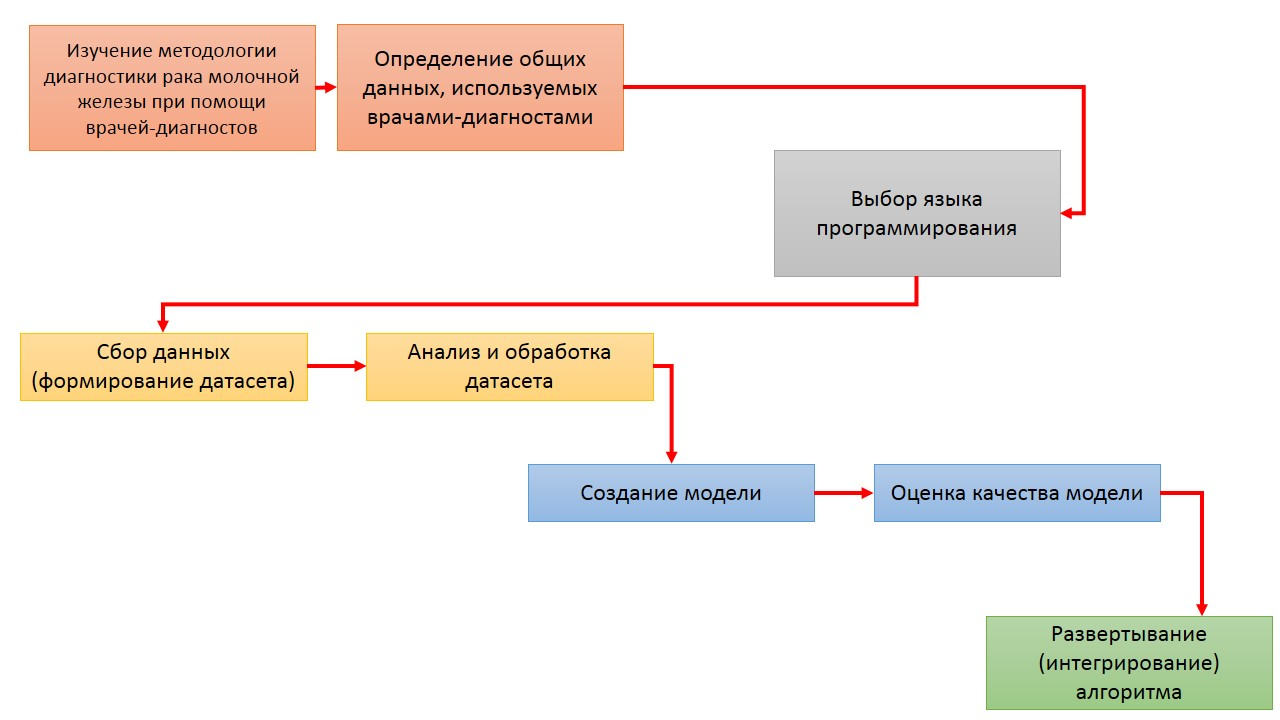

В качестве языка программирования мы будем использовать Python в среде разработки Google Colaboratory (COLAB).

**План разработки:**

1.   Сбором данных (формирование датасета) будут заниматься врачи-диагносты, занося данные в таблицу "Breast Cancer Wisconsin".
2.   Анализом и обработкой датасета будет заниматься сотрудник с должностью Data Scientist
3. Создание модели будет заниматься разработчик Python
4. Оценкой качества модели будет заниматься совместно сотрудник Data Scientist и разработчик Python
5. Развертыванием алгоритма занимается разработчик Python






# 2) Понимание данных

В качестве собранных данных (формирование датасета) мы будем использовать датасет в Scikit-Learn datasets. В данном датасете собраны все данные диагностики рака молочной железы.

In [ ]:
# импортируем датасет "Breast Cancer Wisconsin"
from sklearn import datasets

# загрузим датасет диагностики в data
data = datasets.load_breast_cancer()

# посмотрим содержимое данных
print(data.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


Видим ключи:

**data** - это необходимые для предсказания данные (показатели, полученные при сканировании, такие как радиус, площадь и другие)

**target** - это целевые данные (переменная, является ли опухоль злокачественной (значение 0) или доброкачественной (значение 1) )

**feature_names** - это имена столбцов в data

**target_names **- это названия целевого столбца 

**DESCR** - сокращение от DESCRIPTION, представляет собой описание выборки

Ниже данные собраны в достаточном объеме, по ключу DESR предоставляется описание датасета.

In [ ]:
# посмотрим описание датасета
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

# 3) Подготовка данных

In [ ]:
# импорт pandas
import pandas as pd

# Загрузим датасет в датафрейм
df = pd.DataFrame(data.data, columns=data.feature_names)
# Добавим столбец target и заполним его данными.
df['target'] = data.target
# Посмотрим получившийся датафрейм первые 100 строк
df.head(100)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.66560,0.71190,0.26540,0.4601,0.11890,0
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.18660,0.24160,0.18600,0.2750,0.08902,0
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.42450,0.45040,0.24300,0.3613,0.08758,0
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.86630,0.68690,0.25750,0.6638,0.17300,0
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.20500,0.40000,0.16250,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,20.260,23.03,132.40,1264.0,0.09078,0.13130,0.146500,0.086830,0.2095,0.05649,...,31.59,156.10,1750.0,0.1190,0.35390,0.40980,0.15730,0.3689,0.08368,0
96,12.180,17.84,77.79,451.1,0.10450,0.07057,0.024900,0.029410,0.1900,0.06635,...,20.92,82.14,495.2,0.1140,0.09358,0.04980,0.05882,0.2227,0.07376,1
97,9.787,19.94,62.11,294.5,0.10240,0.05301,0.006829,0.007937,0.1350,0.06890,...,26.29,68.81,366.1,0.1316,0.09473,0.02049,0.02381,0.1934,0.08988,1
98,11.600,12.84,74.34,412.6,0.08983,0.07525,0.041960,0.033500,0.1620,0.06582,...,17.16,82.96,512.5,0.1431,0.18510,0.19220,0.08449,0.2772,0.08756,1


Визуально в датасете не наблюдаются пустые значения NaN.
Просмотрим датафрейм какими данными заполнен датасет.

In [ ]:
# посмотрим датасет с помощью функции info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

По результату функции info() видим, что столбцы содержат ровно 569 значений. При наличии пустых значений можно было удалить функцией dropna() либо заполнить среднемедианными значениями. Поэтому в данном случае будем считать, что данные очищены, отобраны и приведены в надлежащий формат.

Также обращаем внимание, что все данные имеют числовые значения.
Делаем вывод, что датасет готов к использованию для машинного обучения.

# 4) Моделирование

In [ ]:
# разделение данных с помощью Scikit-Learn train_test_split
from sklearn.model_selection import train_test_split

In [ ]:
# набор данных
X = data.data
# целевые данные (доброкачественная опухоль = 1 или злокачественная опухоль = 0)
y = data.target

# делим данные на обучающую (X_train, y_train) и тестовые (X_test, y_test)
X_train, X_test, y_train, y_test = train_test_split(X, y)

# посмотрим размерность данных
print('Размерность обучающих данных X_train:',X_train.shape)
print('Размерность обучающих данных y_train:',y_train.shape)
print('Размерность тестовых данных X_test:',X_test.shape)
print('Размерность тестовых данных y_test:',y_test.shape)

# загрузим модуль алгоритма К-ближайших соседей
from sklearn.neighbors import KNeighborsClassifier

# создадим модель K-ближайших соседей
model_K = KNeighborsClassifier(n_neighbors=6)
# обучаем модель, загружая целевые тренировочные данные (X_train) и тренировочные данные (y_train)
model_K.fit(X_train, y_train)

# сделаем на тестовых данных X_test предсказание модели
m_pred_K = model_K.predict(X_test)

# сравним результат предсказаннной модели с тестовым.
print('Результат предсказания:',m_pred_K[10],'и теста:', y_test[10])

Размерность обучающих данных X_train: (426, 30)
Размерность обучающих данных y_train: (426,)
Размерность тестовых данных X_test: (143, 30)
Размерность тестовых данных y_test: (143,)
Результат предсказания: 1 и теста: 1


Попробуем сделать модель С-классификацией опорных векторов (SVC)

In [ ]:
import sklearn

# создадим модель SVC
model_SVC = sklearn.svm.SVC()
# загрузим обучающие данные 
model_SVC.fit(X_train,y_train)

SVC()

In [ ]:
# сделаем на тестовых данных X_test предсказание модели
m_pred_SVC = model_SVC.predict(X_test)

# сравним результат предсказаннной модели с тестовым.
print('Результат предсказания:',m_pred_SVC[10],'и теста:', y_test[10])

Результат предсказания: 1 и теста: 1


# 5) Оценка (интерпретация результатов)

На данном этапе будем сравнивать модели и выявлять, какая из моделей лучше диагностирует на основе тестовых данных.

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [ ]:
print('Оценка качества модели К: ', model_K.score(X_test, y_test))
print('Оценка качества модели SVC: ', model_SVC.score(X_test, y_test))

Оценка качества модели К:  0.9020979020979021
Оценка качества модели SVC:  0.8811188811188811


In [ ]:
#доли верных ответов
print('Доли верных ответов моделей.')
print('Модель K:', accuracy_score(y_test, m_pred_K))
print('Модель SVC:', accuracy_score(y_test, m_pred_SVC))

Доли верных ответов моделей.
Модель K: 0.9020979020979021
Модель SVC: 0.8811188811188811


In [ ]:
# доли точности
print('Доли точности ответов моделей.')
print('Модель К:', precision_score(y_test, m_pred_K, average='weighted'))
print('Модель SVC:', precision_score(y_test, m_pred_SVC, average='weighted'))

Доли точности ответов моделей.
Модель К: 0.9056328287097518
Модель SVC: 0.8914549546198482


In [ ]:
# доли полноты
print('Доли полноты ответов моделей.')
print('Модель К:', recall_score(y_test, m_pred_K, average='weighted'))
print('Модель SVC:', recall_score(y_test, m_pred_SVC, average='weighted'))

Доли полноты ответов моделей.
Модель К: 0.9020979020979021
Модель SVC: 0.8811188811188811


Поскольку наши модели обязаны быть чувствительны к идентификации рака молочной железы при классификации, то предпочтительным показателем оценки является показатель точности (Precision). Судя по результатам, модель K точнее предсказывает наличие рака молочной железы, чем модель SVC.

Теперь визуализируем данные моделей для наглядности.

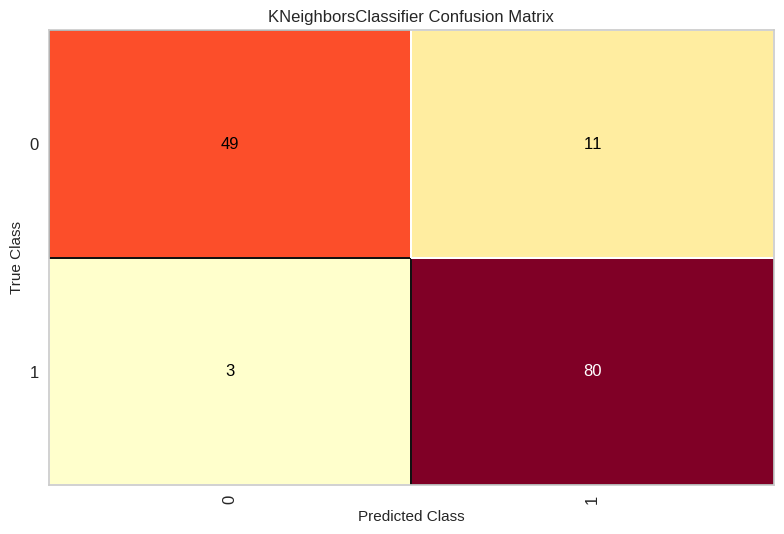

<Axes: title={'center': 'KNeighborsClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
# эта библиотека Python, упрощающая создание наглядных визуализаций для моделей машинного обучения, разработанных с помощью Scikit-learn
from yellowbrick.classifier import ConfusionMatrix

# Загрузим модель К в матрицу ошибок
cm = ConfusionMatrix(model_K)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

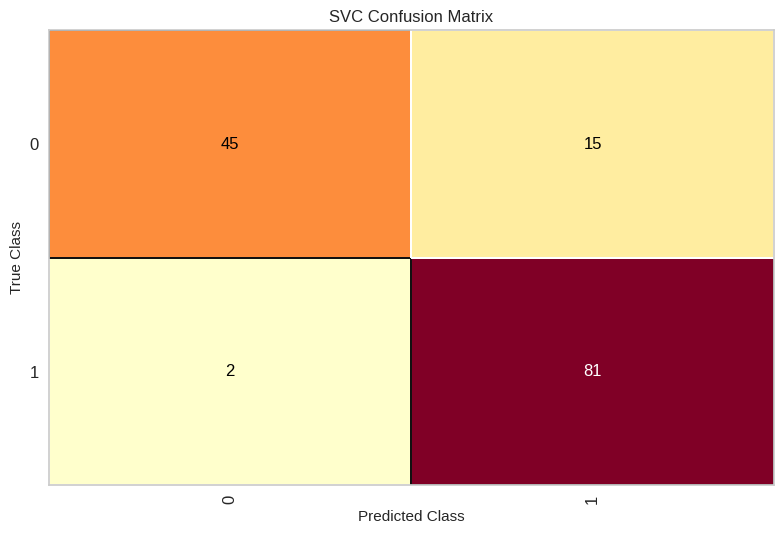

<Axes: title={'center': 'SVC Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
# Загрузим модель SVC в матрицу ошибок
cm2 = ConfusionMatrix(model_SVC)
cm2.fit(X_train, y_train)
cm2.score(X_test, y_test)
cm2.show()

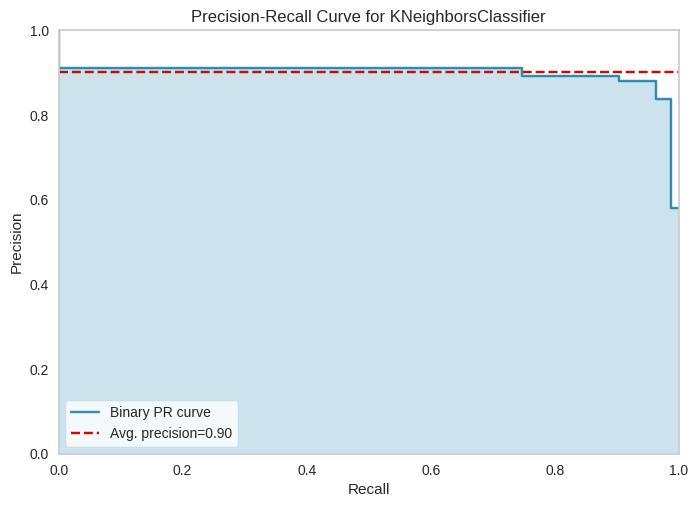

<Axes: title={'center': 'Precision-Recall Curve for KNeighborsClassifier'}, xlabel='Recall', ylabel='Precision'>

In [ ]:
# модуль вычисления пары "Точность-Полноты"
from yellowbrick.classifier import PrecisionRecallCurve

# построение графика "Точность-Полнота" для модели К.
viz = PrecisionRecallCurve(model_K)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

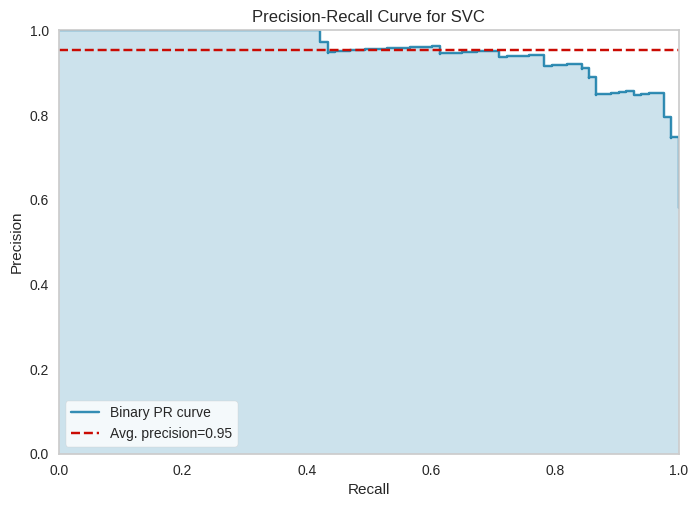

<Axes: title={'center': 'Precision-Recall Curve for SVC'}, xlabel='Recall', ylabel='Precision'>

In [ ]:
# построение графика "Точность-Полнота" для модели SVC.
viz2 = PrecisionRecallCurve(model_SVC)
viz2.fit(X_train, y_train)
viz2.score(X_test, y_test)
viz2.show()

Подводим итог: для усовершенствования модели необходимы больше тренировочных данных, чтобы максимально повысить точность диагностии рака молочной железы моделью.

# 6) Развертывание проекта

Обученную модель диагностики рака молочных желез можно внедрить в медицинскую организацию (условно) для быстрой диагностики. Модель будет загружена в специализированное ПО, которое на вход получает изображения, а на выходе определяет наличие/отсутствие рака.

Данный проект будет размещен в виде репозитария на GitHub.
Ссылка на репозитарий: https://github.com/EvgeniaAs/-_-8 